In [31]:
import pandas as pd

In [32]:
df = pd.read_excel("dataset/book1.xlsx",header=None,names=["#","col1","col2","col3","col4"],index_col=0)

In [33]:
df

,col1,col2,col3,col4
#,,,,
1,23,334,98,-10
2,56,341,56,54
3,56,342,12,-40
4,34,234,122,-30
5,12,563,45,5


In [34]:
df["col1"] # series

#
1    23
2    56
3    56
4    34
5    12
Name: col1, dtype: int64

In [35]:
df[["col1","col2"]] # dataframe

,col1,col2
#,,
1,23,334
2,56,341
3,56,342
4,34,234
5,12,563


In [36]:
df[0]

KeyError: 0

In [37]:
df.iloc[0] # row

col1     23
col2    334
col3     98
col4    -10
Name: 1, dtype: int64

In [38]:
print(df["col1"].sum())
print(df["col2"].mean())
print(df["col3"].max())

181
362.8
122


<Axes: ylabel='Density'>

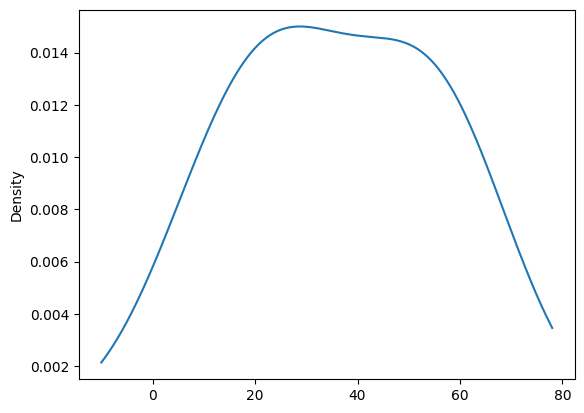

In [39]:
df.col1.plot(kind='kde')

<Axes: xlabel='#'>

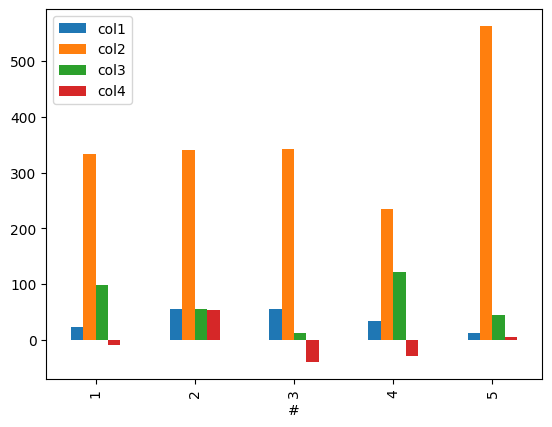

In [40]:
df.plot(kind="bar")

passing your manual data dictionary to pandas

In [45]:
data={
    "country":["Brazil","Russia","India","China","South Africa"],
    "population":[22.40,143.47,1234,435.83,543.50],
    "gdp":[1.86,3.2,5.22.4,0.43],
    "area":[645643,376464,948755,767594,578433]
}
cdf=pd.DataFrame(data)
cdf

SyntaxError: invalid syntax. Perhaps you forgot a comma? (45394512.py, line 4)

In [ ]:
print(cdf["gdp"].mean())

In [ ]:
cdf.plot(kind="bar",x="country",y="population",figsize=(5,3))

In [ ]:
cdf.plot(kind="bar",x="country",y="population",logy=True)

In [ ]:
cdf.plot(kind="bar",x="country",y="population",logy=True,color="green",alpha=0.5,hatch="//",edgecolor="white")

In [ ]:
cdf.columns.tolist()

pandas Dataframe manipulation
- rename columns
- replace values
- add new column
- remove column
- drop duplicates
- drop rows with missing values
- creating subsets
- merging dataframes

In [ ]:
import numpy as np
df = pd.DataFrame({
    "Rank":[1,2,3,4,5,6,7,8,9,10],
    "country name":["India","United States","Indonesia","Pakistan","Brazil","Bnagladesh","Russia","Nigeria","Mexico","Japan"],
    "currency":["INR","USD",np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
}
)
df

,Rank,country name,currency
0,1,India,INR
1,2,United States,USD
2,3,Indonesia,NaN
3,4,Pakistan,NaN
4,5,Brazil,NaN
5,6,Bnagladesh,NaN
6,7,Russia,NaN
7,8,Nigeria,NaN
8,9,Mexico,NaN
9,10,Japan,NaN


In [ ]:
df.Rank

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Rank, dtype: int64

In [ ]:
df.rename(
    columns={
        "Rank":"rank",
        "country name":"country",
    }
)

,rank,country,currency
0,1,India,INR
1,2,United States,USD
2,3,Indonesia,NaN
3,4,Pakistan,NaN
4,5,Brazil,NaN
5,6,Bnagladesh,NaN
6,7,Russia,NaN
7,8,Nigeria,NaN
8,9,Mexico,NaN
9,10,Japan,NaN


In [ ]:
df

,Rank,country name,currency
0,1,India,INR
1,2,United States,USD
2,3,Indonesia,NaN
3,4,Pakistan,NaN
4,5,Brazil,NaN
5,6,Bnagladesh,NaN
6,7,Russia,NaN
7,8,Nigeria,NaN
8,9,Mexico,NaN
9,10,Japan,NaN


In [ ]:
df.iloc[9].replace(np.nan,"YEN")

Rank               10
country name    Japan
currency          YEN
Name: 9, dtype: object

In [ ]:
df.iloc[9]

Rank               10
country name    Japan
currency          NaN
Name: 9, dtype: object

In [ ]:
# adding a column
df["colx"]=10

In [ ]:
values=[3,5,6,2,6,8,9,7,9,4]
df["coly"]= values # list of values
df

,Rank,country name,currency,colx,coly
0,1,India,INR,10,3
1,2,United States,USD,10,5
2,3,Indonesia,NaN,10,6
3,4,Pakistan,NaN,10,2
4,5,Brazil,NaN,10,6
5,6,Bnagladesh,NaN,10,8
6,7,Russia,NaN,10,9
7,8,Nigeria,NaN,10,7
8,9,Mexico,NaN,10,9
9,10,Japan,NaN,10,4


In [ ]:
# adding a column based on operation on other columns
df["colx"]* df["colx"]*df["coly"]
df

,Rank,country name,currency,colx,coly
0,1,India,INR,10,3
1,2,United States,USD,10,5
2,3,Indonesia,NaN,10,6
3,4,Pakistan,NaN,10,2
4,5,Brazil,NaN,10,6
5,6,Bnagladesh,NaN,10,8
6,7,Russia,NaN,10,9
7,8,Nigeria,NaN,10,7
8,9,Mexico,NaN,10,9
9,10,Japan,NaN,10,4


In [ ]:
# updating a colun values based on operation
df["coly"]= df["coly"].apply(lambda x: x%10)
df

,Rank,country name,currency,colx,coly
0,1,India,INR,10,3
1,2,United States,USD,10,5
2,3,Indonesia,NaN,10,6
3,4,Pakistan,NaN,10,2
4,5,Brazil,NaN,10,6
5,6,Bnagladesh,NaN,10,8
6,7,Russia,NaN,10,9
7,8,Nigeria,NaN,10,7
8,9,Mexico,NaN,10,9
9,10,Japan,NaN,10,4


In [ ]:
# remove a column
df= df.drop(columns=["colx"])

In [ ]:
df.drop_duplicates(subset=["coly"])

,Rank,country name,currency,coly
0,1,India,INR,3
1,2,United States,USD,5
2,3,Indonesia,NaN,6
3,4,Pakistan,NaN,2
5,6,Bnagladesh,NaN,8
6,7,Russia,NaN,9
7,8,Nigeria,NaN,7
9,10,Japan,NaN,4


In [44]:
df.dropna()

,col1,col2,col3,col4
#,,,,
1,23,334,98,-10
2,56,341,56,54
3,56,342,12,-40
4,34,234,122,-30
5,12,563,45,5


In [48]:
adf = pd.DataFrame({
    "A":[1,2,3,4],
    "B":[5,6,7,8]
})
bdf = pd.DataFrame({
    "C":[2,3,5,1],
    "D":[6,7,8,9]
})
cdf = pd.DataFrame({
    "A":[5,6,7,8],
    "B":[9,10,11,12]
})

In [51]:
# merge two datafrmes
pd.concat([adf,bdf],axis=1) # column wise

,A,B,C,D
0,1,5,2,6
1,2,6,3,7
2,3,7,5,8
3,4,8,1,9


In [52]:
pd.concat([adf,bdf]) # row wise

,A,B,C,D
0,1.0,5.0,NaN,NaN
1,2.0,6.0,NaN,NaN
2,3.0,7.0,NaN,NaN
3,4.0,8.0,NaN,NaN
0,NaN,NaN,2.0,6.0
1,NaN,NaN,3.0,7.0
2,NaN,NaN,5.0,8.0
3,NaN,NaN,1.0,9.0
